# Working with Data APIs

**Adapted from: Sam Maurer // maurer@berkeley.edu // Oct. 3, 2016**

This notebook provides a demonstration of data-access APIs that operate over the web. See README.md for setup instructions.

In Part 1, we'll load and parse results from an API feed of earthquake data.  
In Part 2, we'll add query parameters to the workflow, using the Google Maps Geolocation API as an example.  
In Part 3, we'll use an authenticated API to query public Twitter posts. 

# Part 1: Reading from an automated data feed

### USGS real-time earthquake feeds

This is an API for near-real-time data about earthquakes. Data is provided in JSON format over the web. No authentication is needed, and there's no way to customize the output. Instead, the API has a separate endpoint for each permutation of the data that users might want.

**API documentation:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php

**Sample API endpoint, for magnitude 4.5+ earthquakes in past day:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_day.geojson  


In [66]:
%matplotlib inline

import pandas as pd

import json    # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [67]:
# download data on magnitude 2.5+ quakes from the past week

endpoint_url = "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson"
response = requests.get(endpoint_url)
results = response.text

# what is the data type of the results?
print(type(results))

<class 'str'>


In [68]:
# print the first 500 characters to see a sample of the data

print(results[:500])

{"type":"FeatureCollection","metadata":{"generated":1520380697000,"url":"https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson","title":"USGS Magnitude 2.5+ Earthquakes, Past Week","status":200,"api":"1.5.8","count":340},"features":[{"type":"Feature","properties":{"mag":2.6,"place":"73km ENE of Old Iliamna, Alaska","time":1520379834731,"updated":1520380496848,"tz":-540,"url":"https://earthquake.usgs.gov/earthquakes/eventpage/ak18606423","detail":"https://earthquake.usgs.gov/


In [69]:
# it looks like the results are a string with JSON-formatted data inside

# parse the string into a Python dictionary
data = json.loads(results)

print(type(data))

<class 'dict'>


In [70]:
# print the most recent quake

quakes = data['features']
print(quakes[0])

{'type': 'Feature', 'properties': {'mag': 2.6, 'place': '73km ENE of Old Iliamna, Alaska', 'time': 1520379834731, 'updated': 1520380496848, 'tz': -540, 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/ak18606423', 'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/ak18606423.geojson', 'felt': None, 'cdi': None, 'mmi': None, 'alert': None, 'status': 'automatic', 'tsunami': 0, 'sig': 104, 'net': 'ak', 'code': '18606423', 'ids': ',ak18606423,', 'sources': ',ak,', 'types': ',geoserve,origin,', 'nst': None, 'dmin': None, 'rms': 0.51, 'gap': None, 'magType': 'ml', 'type': 'earthquake', 'title': 'M 2.6 - 73km ENE of Old Iliamna, Alaska'}, 'geometry': {'type': 'Point', 'coordinates': [-153.658, 59.9499, 169.8]}, 'id': 'ak18606423'}


In [71]:
# print it more clearly

pp.pprint(quakes[0]['geometry'])
pp.pprint(quakes[0]['properties'])

{'coordinates': [-153.658, 59.9499, 169.8], 'type': 'Point'}
{'alert': None,
 'cdi': None,
 'code': '18606423',
 'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/ak18606423.geojson',
 'dmin': None,
 'felt': None,
 'gap': None,
 'ids': ',ak18606423,',
 'mag': 2.6,
 'magType': 'ml',
 'mmi': None,
 'net': 'ak',
 'nst': None,
 'place': '73km ENE of Old Iliamna, Alaska',
 'rms': 0.51,
 'sig': 104,
 'sources': ',ak,',
 'status': 'automatic',
 'time': 1520379834731,
 'title': 'M 2.6 - 73km ENE of Old Iliamna, Alaska',
 'tsunami': 0,
 'type': 'earthquake',
 'types': ',geoserve,origin,',
 'tz': -540,
 'updated': 1520380496848,
 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/ak18606423'}


In [72]:
pp.pprint(quakes[0]['geometry'])

{'coordinates': [-153.658, 59.9499, 169.8], 'type': 'Point'}


In [73]:
# pull out the title from each earthquake listing

for q in quakes:
    print(q['properties']['title'])

M 2.6 - 73km ENE of Old Iliamna, Alaska
M 4.3 - 41km E of Amatignak Island, Alaska
M 4.4 - 98km SW of Porgera, Papua New Guinea
M 4.7 - 158km W of Ile Hunter, New Caledonia
M 2.8 - 12km SSW of Toms Place, CA
M 4.3 - 73km S of Calama, Chile
M 4.8 - 55km SSW of Paredon, Mexico
M 2.6 - 12km N of Baker, Nevada
M 3.3 - 178km ESE of Akutan, Alaska
M 4.1 - 18km NNE of Cherokee, Oklahoma
M 4.9 - 114km WSW of Mendi, Papua New Guinea
M 5.1 - 86km W of Mendi, Papua New Guinea
M 4.9 - 100km WSW of Mendi, Papua New Guinea
M 4.2 - 113km SW of Porgera, Papua New Guinea
M 4.7 - 93km WSW of Mendi, Papua New Guinea
M 4.5 - 111km N of Culebra, Puerto Rico
M 2.5 - 4km SE of Piru, CA
M 4.9 - 106km SW of Porgera, Papua New Guinea
M 5.0 - 78km WSW of Mendi, Papua New Guinea
M 4.1 - 125km SW of Porgera, Papua New Guinea
M 4.3 - 24km NE of San Clemente, Chile
M 3.1 - 256km ESE of Kodiak, Alaska
M 4.6 - 158km WSW of Kuripan, Indonesia
M 5.2 - 109km SW of Porgera, Papua New Guinea
M 4.5 - Fiji region
M 5.2 - 97k

In [80]:
# pull out magnitudes and depths into a Pandas dataframe, using
# a more compact Python syntax for iterating through lists

d = {'magnitude': [q['properties']['mag'] for q in quakes],
     'depth': [q['geometry']['coordinates'][2] for q in quakes]}

df = pd.DataFrame.from_dict(d)

# how many earthquakes were loaded into the dataframe?
print(len(df))

340


In [81]:
# print the first few lines of data

print(df.head())

    depth  magnitude
0  169.80       2.60
1   35.00       4.30
2   10.00       4.40
3   10.00       4.70
4    3.21       2.79


In [82]:
# print some descriptive statistics

print(df.describe())

            depth   magnitude
count  340.000000  340.000000
mean    51.341374    4.010265
std     84.176510    0.892194
min     -6.900000    2.460000
25%     10.000000    3.200000
50%     21.000000    4.200000
75%     61.100000    4.700000
max    673.740000    6.700000


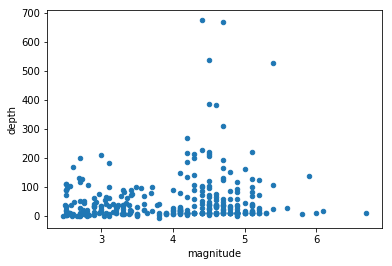

In [83]:
# plot the depth vs. magnitude

df.plot(x='magnitude', y='depth', kind='scatter')

In [84]:
# save the dataframe to disk

df.to_csv('usgs_earthquake_data.csv')

print('file saved')

file saved


In [85]:
# read it back later

new_df = pd.DataFrame.from_csv('usgs_earthquake_data.csv')

print(new_df.head())

    depth  magnitude
0  169.80       2.60
1   35.00       4.30
2   10.00       4.40
3   10.00       4.70
4    3.21       2.79


# Part 2: Querying an API endpoint

### Google Maps Geocoding API

Google has lots of APIs that let you access its services through code instead of through GUI apps. This one from Google Maps lets you look up the latitude-longitude coordinates of street addresses.

It works similarly to the earthquakes example, but with query parameters added to the URL endpoint!

**API documentation:**  
https://developers.google.com/maps/documentation/geocoding/intro

**API endpoint:**  
https://maps.googleapis.com/maps/api/geocode/json

**API endpoint with query parameters:**  
https://maps.googleapis.com/maps/api/geocode/json?address=Wurster+Hall

In [86]:
import json    # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [87]:
# we have to encode the search query so that it can be passed as a URL, 
# with spaces and other special characters removed

endpoint = 'https://maps.googleapis.com/maps/api/geocode/json'

params = {'address': 'young library uky'}

url = requests.Request('GET', endpoint, params=params).prepare().url
print(url)

https://maps.googleapis.com/maps/api/geocode/json?address=young+library+uky


In [88]:
# download and parse the results

response = requests.get(url)
results = response.text
data = json.loads(results)

print(data)

{'results': [{'address_components': [{'long_name': '401', 'short_name': '401', 'types': ['street_number']}, {'long_name': 'Hilltop Avenue', 'short_name': 'Hilltop Ave', 'types': ['route']}, {'long_name': 'Lexington', 'short_name': 'Lexington', 'types': ['locality', 'political']}, {'long_name': 'Fayette County', 'short_name': 'Fayette County', 'types': ['administrative_area_level_2', 'political']}, {'long_name': 'Kentucky', 'short_name': 'KY', 'types': ['administrative_area_level_1', 'political']}, {'long_name': 'United States', 'short_name': 'US', 'types': ['country', 'political']}, {'long_name': '40506', 'short_name': '40506', 'types': ['postal_code']}, {'long_name': '0001', 'short_name': '0001', 'types': ['postal_code_suffix']}], 'formatted_address': '401 Hilltop Ave, Lexington, KY 40506, USA', 'geometry': {'location': {'lat': 38.0328721, 'lng': -84.5017179}, 'location_type': 'ROOFTOP', 'viewport': {'northeast': {'lat': 38.0342210802915, 'lng': -84.50036891970849}, 'southwest': {'lat

In [89]:
# if needed google_key = ''

In [90]:
# print it more nicely

pp.pprint(data)

{'results': [{'address_components': [{'long_name': '401',
                                      'short_name': '401',
                                      'types': ['street_number']},
                                     {'long_name': 'Hilltop Avenue',
                                      'short_name': 'Hilltop Ave',
                                      'types': ['route']},
                                     {'long_name': 'Lexington',
                                      'short_name': 'Lexington',
                                      'types': ['locality', 'political']},
                                     {'long_name': 'Fayette County',
                                      'short_name': 'Fayette County',
                                      'types': ['administrative_area_level_2',
                                                'political']},
                                     {'long_name': 'Kentucky',
                                      'short_name': 'KY',
               

In [91]:
# pull out the lat-lon coordinates

for r in data['results']:
    coords = r['geometry']['location']
    print(coords['lat'], coords['lng'])

38.0328721 -84.5017179


### Exercises

1. Search for some other addresses or landmarks!
2. Take a look at the [API documentation](https://developers.google.com/maps/documentation/geocoding/intro). What are the usage limits?

In [92]:
endpoint = 'https://maps.googleapis.com/maps/api/geocode/json'

params = {'address': '152 East Fourth St, Lexington, KY 40508'}

url = requests.Request('GET', endpoint, params=params).prepare().url
print(url)

https://maps.googleapis.com/maps/api/geocode/json?address=152+East+Fourth+St%2C+Lexington%2C+KY+40508


In [93]:
# download and parse the results

response = requests.get(url)
results = response.text
data = json.loads(results)

print(data)

{'results': [{'address_components': [{'long_name': '152', 'short_name': '152', 'types': ['street_number']}, {'long_name': 'East Fourth Street', 'short_name': 'E Fourth St', 'types': ['route']}, {'long_name': 'Martin Luther King', 'short_name': 'Martin Luther King', 'types': ['neighborhood', 'political']}, {'long_name': 'Lexington', 'short_name': 'Lexington', 'types': ['locality', 'political']}, {'long_name': 'Fayette County', 'short_name': 'Fayette County', 'types': ['administrative_area_level_2', 'political']}, {'long_name': 'Kentucky', 'short_name': 'KY', 'types': ['administrative_area_level_1', 'political']}, {'long_name': 'United States', 'short_name': 'US', 'types': ['country', 'political']}, {'long_name': '40508', 'short_name': '40508', 'types': ['postal_code']}], 'formatted_address': '152 E Fourth St, Lexington, KY 40508, USA', 'geometry': {'bounds': {'northeast': {'lat': 38.0497445, 'lng': -84.4893103}, 'southwest': {'lat': 38.0495981, 'lng': -84.4895068}}, 'location': {'lat': 

In [94]:
pp.pprint(data)

{'results': [{'address_components': [{'long_name': '152',
                                      'short_name': '152',
                                      'types': ['street_number']},
                                     {'long_name': 'East Fourth Street',
                                      'short_name': 'E Fourth St',
                                      'types': ['route']},
                                     {'long_name': 'Martin Luther King',
                                      'short_name': 'Martin Luther King',
                                      'types': ['neighborhood', 'political']},
                                     {'long_name': 'Lexington',
                                      'short_name': 'Lexington',
                                      'types': ['locality', 'political']},
                                     {'long_name': 'Fayette County',
                                      'short_name': 'Fayette County',
                                      'types': [

In [95]:
for r in data['results']:
    coords = r['geometry']['location']
    print(coords['lat'], coords['lng'])

38.04968179999999 -84.48938


In [96]:
# 2,500 free requests per day, calculated as the sum of client-side and server-side queries.
# 50 requests per second, calculated as the sum of client-side and server-side queries.

# Part 3: Querying an API with authentication

### Twitter REST APIs

Twitter's APIs also operate over the web, but they require a back-and-forth authentication process at the beginning of each connection. It's easier to have a Python library handle this than to create the query URLs ourselves.

The Twitter "REST" APIs perform stand-alone operations: you submit a query and receive results, like in earlier examples. ([REST](https://en.wikipedia.org/wiki/Representational_state_transfer) is a particular set of guidelines that many APIs follow.) Twitter also has a "streaming" API that continues sending results in real time until you disconnect.

**API documentation:**  
https://dev.twitter.com/rest/public  
https://dev.twitter.com/overview/api/tweets

**Documentation for the Python helper library**:  
https://github.com/geduldig/TwitterAPI

In [97]:
from TwitterAPI import TwitterAPI

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [98]:
# import API credentials from keys.py file in the
# same directory as this notebook

from keys import *

In [99]:
# set up an API connection using credentials from the keys file

api = TwitterAPI(consumer_key, consumer_secret, 
                 access_token, access_token_secret)

print("Connection is set up but not tested")

Connection is set up but not tested


### Making a simple data request

In [100]:
# most recent tweet from @UCBerkeley's timeline

endpoint = 'statuses/user_timeline'
params = {
    'screen_name': 'UKAthletics', 
    'count': 5
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'])

RT @UKBaseball: A good night has turned into a HUGE night for @Tsquires16, whose second two-run double of the night makes it 11-5 UK in B7.…
RT @UKsoftball: FINAL - #22 Kentucky 4, SIUE 1

Kentucky finishes the homestand 6-0 and is now on a 10-game winning streak. 

Now? It gets…
RT @UKsoftball: HOME RUN ABBEY CHEEK!!

She hits her second in three games, and UK has tied the game, 1-1. https://t.co/8aMcud54zq
No sign of cooling down from this guy. #WeAreUK https://t.co/VxLixlzesG
RT @BBNRewards: You can’t go wrong with a little softball or baseball action on this gorgeous Tuesday!! First pitch for both games is at 4!…


In [101]:
# what other data is there?

pp.pprint(tweet)

{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Mar 06 18:57:43 +0000 2018',
 'entities': {'hashtags': [],
              'symbols': [],
              'urls': [],
              'user_mentions': [{'id': 4450811733,
                                 'id_str': '4450811733',
                                 'indices': [3, 14],
                                 'name': 'BBN Rewards',
                                 'screen_name': 'BBNRewards'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 971097512282152962,
 'id_str': '971097512282152962',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 4,
 'retweeted': False,
 'retweeted_status': {'contributors': None,
                      'coordinates': None,
                      'created_at': 'Tue Mar 06 18:31:17 +0000 2018',

### Other API endpoints allow different types of searches

In [102]:
# search for public tweets about #BBN

endpoint = 'search/tweets'
params = {
    'q': '#BBN', 
    'count': 5
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

@AntDavis23 The whole Big Blue squad-and we miss Nico #WindyCity #BBN #LaFamilia

HERALD-LEADER: UK track sensation Sydney McLaughlin wants to be 'one of the world's best' https://t.co/uP9CNqLXP5… https://t.co/F2qwVpgUyV

#BBN https://t.co/AzzVFQvmg8

RT @Defence24pl: #BBN podkreśla, że ustawa o wyposażaniu sojuszników w polską broń jest kolejnym krokiem zacieśniającym współpracę na wscho…

When you have season tickets for @UKBaseball but you also have the man flu so you gotta watch at home. But at least… https://t.co/qNfII1nFzr



In [103]:
# search for public tweets in Hindi

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'lang': 'hi', 
    'count': 5
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

RT @iRajuSrivastav: जूता पहन के रेक्सिन का
स्वराज सुजा दो लेनिन का ..😀😀😀
भारत माता की जय 🎪

#Lenin 
#LeninStatue 
#LolSalaam

RT @iamdkt12: प्यार तो उसी दिन हो गया था 
जब उसने 
अपनी सेहली की शादी में आवाज लगाकर कहा था 
गर्म पूरी लाओ ना plz 
😂😂😝😂😝😂😝😝

RT @PinkySh38785326: शिक्षा मित्र बन रहे है बलि का बकरा
इतिहास बन गयी शिक्षा मित्रो की मौते
इलाहाबाद।
विकास खंड कौन्धियारा इलाहाबाद  की शि…

RT @saket71: कार्ति चिदम्बरम के जन्म के बरसों पूर्व लेनिन ही प्रथम भारतीय थे जिन्होंने कैश एवम् काईंड में घूस स्वीकार करने की परंपरा स्थापि…

RT @Shivraj224: #स्वर्ग_VS_सतलोक 
ब्रह्मा विष्णु महेश की भक्ति कर के हम सिर्फ स्वर्ग तक ही जा सकते हैं फिर उसके बाद 84 लाख योनियों में पटक…



In [104]:
# search for public tweets geotagged near the UK campus

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'geocode': '38.034,-84.500,0.5km', 
    'count': 10
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

Need to de-stress? Join Dr. K’s drum circle! 🥁🎶 #ukyhonors @ Lewis Honors College https://t.co/iVoUpxaYLV

If you are like me - you love college basketball and March Madness!! But ...that can lead to a… https://t.co/ypcXfFn0XV

Love Basketball without busting your fitness goals during March! March Madness Survival Guide!  https://t.co/MWNpCIhr3J

what a fabulous day!! thank you for the love and birthday wishes 💕 also, happy national wear… https://t.co/crx0jeWuHj

When all you can think about is spring break but then mid terms hit ((swipe over)) 🙄🙄 #5days… https://t.co/rAdHGgMXX7

Enjoying watching/supporting the Twenhofel MS Band perform at UK! No music program is an island. @JonesJetsPride… https://t.co/btE1MoLIvR

Throw your hands in the air because it’s INTERNATIONAL BADGE DAY!! I… https://t.co/ukIUQEpJp2

Well our time on the Showboat has too soon come to a close. This production will always hold a… https://t.co/FHu6s8wNsJ

Ladies skating into the week! This is how we do Monday at 

### Exercises

1. Try some different search queries!
2. Display some more data fields in addition to the tweet text

In [105]:
# search for public tweets about #BBN

endpoint = 'search/tweets'
params = {
    'q': '#batman', 
    'count': 5
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

RT @wgtc_site: New #Shazam! Set Pic Reveals Another #Batman Easter Egg - https://t.co/I2bi8aoVr6 https://t.co/xdNPCIz3Jr

New #Shazam! Set Pic Reveals Another #Batman Easter Egg - https://t.co/oyzjHusT1S https://t.co/9ohFvf2FLS

RT @anygivenchunday: Last @Gotham table read for the year! #gotham #GothamSeason4 #SeasonFinale #batman #penguin #riddler #brucewayne https…

RT @kevincoulston: Watch me #draw an UGLY #BATMAN! https://t.co/2rDZMepqKm

RT @kevincoulston: Watch me #draw an UGLY #BATMAN! https://t.co/2rDZMepqKm



### Bonus: Streaming live tweets in real time 

In [106]:
# Twitter limits simultaneous connections to the streaming API,
# so this part may not work using the demo API keys during class

endpoint = 'statuses/filter'
params = {'locations': '-180,-90,180,90'}
r = api.request(endpoint, params)
LIMIT = 20

# 'enumerate' lets us count tweets as we receive them

for i, tweet in enumerate(r.get_iterator()):
    print(tweet['created_at'])
    print(tweet['place']['full_name'] + ', ' + tweet['place']['country'])
    print(tweet['text'] + '\n')
    if (i > LIMIT): break

# close the streaming connection
r.close()

Wed Mar 07 00:00:02 +0000 2018
Palmas, Brasil, Brasil
esse trabalho de português tá me dando um RANÇO

Wed Mar 07 00:00:02 +0000 2018
Marbella, Spain, Spain
Silver Snow Studios https://t.co/MVCBCbiz1f #PhotographyStudios

Wed Mar 07 00:00:02 +0000 2018
Valladolid, España, España
Mis novios💥😏💚 https://t.co/M9CW3K73ai

Wed Mar 07 00:00:01 +0000 2018
Bogotá, D.C., Colombia, Colombia
@Winghell Igual: ya tampoco estoy allí tía 🤷🏽‍♂️ https://t.co/mgusD4lcWQ

Wed Mar 07 00:00:02 +0000 2018
Haapavesi, Suomi, Suomi
Wind 0,9 m/s I. Barometer 1013,72 hPa, Vakaa. Temperature -15,9 °C. Rain today 0,0 mm. Humidity 74%

Wed Mar 07 00:00:02 +0000 2018
Serra, Brasil, Brasil
Tô aqui no refeitório do IFES pesando na vida

Wed Mar 07 00:00:02 +0000 2018
大阪 大阪市 北区, 日本
ちょっと阪口大助さんに
「オイィィ、カテジナさんあんたおかしいだろぉぉぉ！」って叫んで欲しい

Wed Mar 07 00:00:02 +0000 2018
South Carolina, USA, United States
If I met you would you be the same person you are here? Cause I know I am. #innovateandcreate

Wed Mar 07 00:00:02 +0000 2018
ال

### Exercises for the remainder of class

1. Make a scatter plot of the lat-lon coordinates of earthquakes.  
   &nbsp;
   
2. Using the geocoding example as a starting point, try searching the Google Maps Directions API or Elevation API instead. Descriptions are in the [API documentation](https://developers.google.com/maps/documentation/geocoding/intro).  
   &nbsp;
   

In [107]:
# pull out magnitudes and depths into a Pandas dataframe, using
# a more compact Python syntax for iterating through lists

d = {'long': [q['geometry']['coordinates'][0] for q in quakes],
     'lat': [q['geometry']['coordinates'][1] for q in quakes]}

df = pd.DataFrame.from_dict(d)

# how many earthquakes were loaded into the dataframe?
print(len(df))

340


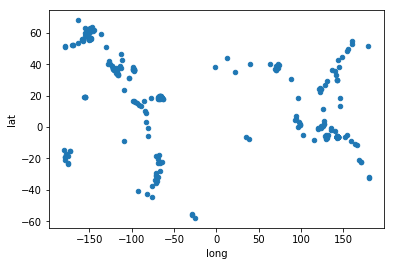

In [108]:
df.plot(x='long', y='lat', kind = 'scatter')

### For next time...

In the next class, you will try out another API that provides data you're interested in. You will be asked to try connecting to it using Python code, and performing some basic operations on the data.  To come prepared for next time, please explore some of the transportation-related APIs that may be valuable, and choose one that is of interest to you.

Here are a a few to get you started. 

Public Transit
https://www.programmableweb.com/news/how-smart-cities-are-using-apis-public-transport-apis/2014/05/22

Long-Distance Travel
http://www.olery.com/blog/the-best-travel-apis-discover-contribute/ 

Transportation
https://www.programmableweb.com/category/transportation/api


Start by reading the public transit page, because that provides a nice overview of the types of applications out there, and some of the issues in using them.  These lessons often apply to traffic and transportation more generally.  

Keep in mind that there are a number of different organizations that provide APIs, with different motivations and quality of what is provided.  If it is a private company, what is their business model?  What is the underlying source of the data, and what might that imply about how representative it is of the real world?  There is a ton of stuff out there.  How do we go about sorting out what is useful to us and what is now.  Spend some time exploring these and thinking about these questions.  


In [ ]:
# metra
# accessKey: 825eafcfb72151832260c9e8463c7733
# secretKey: d6cf5380070ae236d8277b8f10817d86

In [ ]:
# cta
# key: a32e15b42c2e4818be7e410804f2a0eb

In [124]:
from requests.auth import HTTPBasicAuth
requests.get(https://gtfsapi.metrarail.com/gtfs/tripUpdates', auth=HTTPBasicAuth('825eafcfb72151832260c9e8463c7733', 'd6cf5380070ae236d8277b8f10817d86')
endpoint_url = "https://gtfsapi.metrarail.com/gtfs/tripUpdates"
response = requests.get(endpoint_url)
results = response.text

# what is the data type of the results?
results

SyntaxError: invalid syntax (<ipython-input-124-b23c31f25d23>, line 2)

In [132]:
endpoint_url = "http://lapi.transitchicago.com/api/1.0/ttarrivals.aspx?key=a32e15b42c2e4818be7e410804f2a0eb&mapid=40380"
response = requests.get(endpoint_url)
results = response.text

# what is the data type of the results?
print(results[:500])

<?xml version="1.0" encoding="utf-8"?><ctatt><tmst>20180306 19:09:49</tmst><errCd>0</errCd><errNm /><eta><staId>40380</staId><stpId>30075</stpId><staNm>Clark/Lake</staNm><stpDe>Service at Outer Loop platform</stpDe><rn>022</rn><rt>G</rt><destSt>30004</destSt><destNm>Harlem/Lake</destNm><trDr>1</trDr><prdt>20180306 19:09:31</prdt><arrT>20180306 19:10:31</arrT><isApp>1</isApp><isSch>0</isSch><isDly>0</isDly><isFlt>0</isFlt><flags /><lat>41.88381</lat><lon>-87.62621</lon><heading>358</heading></eta


In [134]:
pp.pprint(results)

('<?xml version="1.0" encoding="utf-8"?><ctatt><tmst>20180306 '
 '19:09:49</tmst><errCd>0</errCd><errNm '
 '/><eta><staId>40380</staId><stpId>30075</stpId><staNm>Clark/Lake</staNm><stpDe>Service '
 'at Outer Loop '
 'platform</stpDe><rn>022</rn><rt>G</rt><destSt>30004</destSt><destNm>Harlem/Lake</destNm><trDr>1</trDr><prdt>20180306 '
 '19:09:31</prdt><arrT>20180306 '
 '19:10:31</arrT><isApp>1</isApp><isSch>0</isSch><isDly>0</isDly><isFlt>0</isFlt><flags '
 '/><lat>41.88381</lat><lon>-87.62621</lon><heading>358</heading></eta><eta><staId>40380</staId><stpId>30075</stpId><staNm>Clark/Lake</staNm><stpDe>Service '
 'at Outer Loop '
 'platform</stpDe><rn>430</rn><rt>Brn</rt><destSt>30249</destSt><destNm>Kimball</destNm><trDr>1</trDr><prdt>20180306 '
 '19:09:32</prdt><arrT>20180306 '
 '19:10:32</arrT><isApp>1</isApp><isSch>0</isSch><isDly>0</isDly><isFlt>0</isFlt><flags '
 '/><lat>41.88574</lat><lon>-87.63012</lon><heading>269</heading></eta><eta><staId>40380</staId><stpId>30074</stpId><staN